# Análisis y reporte sobre el desempeño del modelo: Valhalla

**Autor:** Rodolfo Jesús Cruz Rebollar

**Matrícula:** A01368326

**Grupo:** 101

In [1]:
# Importar librería random para trabajar con valores aleatorios

import random as rnd

# Definir una semilla con los últimos 4 dígitos de mi matrícula (8326)

semilla = rnd.seed(8326)


## Importación de los datos

In [2]:
# Importar Numpy para trabajar con arreglos multidimensionales

import numpy as np

# Importar Pandas para manipular y analizar datos

import pandas as pd

# Importar matplotlib para realizar gráficos

import matplotlib.pyplot as plt

# Importar el regresor lineal con gradiente estocástico de la librería Scikit-Learn

from sklearn.linear_model import SGDRegressor

# Importar función train_test_split() del módulo model_selection de Scikit-Learn

from sklearn.model_selection import train_test_split

In [3]:
# Importar el set de datos de Valhalla

valhalla = pd.read_csv("Valhalla23.csv")

# Verificar la correcta importación de los datos

valhalla.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


## Generación de subsets de entrenamiento, prueba y validación

Los porcentajes para entrenamiento, prueba y validación a considerar serán:

* Entrenamiento: 40%

* Prueba: 20%

* Validación: 40%

In [4]:
# Dividir el dataset total en un subconjunto de entrenamiento y otro para prueba con la función train_test_split()

# Nota: se agregó el parámetro random_state con la semilla definida previamente para que al momento de generar los subsets
# aleatoriamente, se obtengan los mismos datos para cada subconjunto en las diferentes ocasiones que se corra el código 

c_train, c_test, v_train, v_test = train_test_split(valhalla["Celsius"], valhalla["Valks"], test_size = 0.6, 
                                                   train_size = 0.4, random_state = semilla)

### Conjunto de entrenamiento

In [5]:
# Formar el subset de entrenamiento con los datos en celsius y valks para entrenamiento (c_train y v_train)

# Introducir los datos como un diccionario al dataframe para que al momento de formar el subset de entrenamiento, 
# los nombres de sus columnas sean automáticamente las claves del diccionario y cada clave se asocie a la serie de
# datos correspondiente

datos_train = pd.DataFrame({"Celsius": c_train, "Valks": v_train})

# Verificar que el subset de entrenamiento se haya creado correctamente

datos_train.head()

,Celsius,Valks
97,26.9390,-34.255
51,47.9700,-95.258
68,-5.0706,64.106
19,75.9490,-174.920
79,27.3290,-27.032


### Conjuntos de validación y prueba

In [6]:
# Formar el subconjunto de prueba inicial con los datos derivados de la partición del dataset total, contenidos en 
# las variables c_test y v_test, que corresponden a datos en celsius y valks pero esta vez ambos para prueba

# Esta vez, la clave Celsius del diccionario tendrá asociados los datos en celsius destinados para formar el conjunto 
# de prueba inicial, mientras que la clave Valks se asociará con los datos en valks igualmente destinados para el subset
# inicial de prueba

# Se denomina subset de prueba inicial porque aún falta realizar otra partición sobre el conjunto de prueba inicial para
# formar el conjunto de validación

test_0 = pd.DataFrame({"Celsius": c_test, "Valks": v_test})

# Mostrar la correcta generación de subset inicial de prueba

test_0.head()

,Celsius,Valks
83,34.9720,-54.496
95,-7.0094,69.632
14,60.0280,-142.490
45,28.9760,-40.934
82,38.5260,-65.580


Ahora en base al subset de prueba inicial creado previamente, se creará un tercer subconjunto de datos destinado para la validación del modelo, que se define como la etapa en la cual, se ajustan los hiperparámetros del modelo entrenado para que éstos tengan los mejores valores posibles para que el modelo en si mismo se logre ajustar de manera adecuada a los datos de prueba cuando una vez que se hayan determinado los parámetros óptimos del modelo y ahora sí se proceda a evaluar el grado de desempeño del modelo con los parámetros optimizados en la etapa de validación anterior, por lo cual, para crear el subset de validación, se tomará como base el subset de prueba inicial que ya hemos creado almacenado en test_0, para luego volver a emplear la función train_test_split() de Scikit-Learn, pero ahora dicha función se aplicará sobre el subset de prueba inicial (test_0) obtenido antes y como parámetros de entrada de la función, en esta ocasión, la proporción del subset que se utilizará para "entrenamiento" que en realidad será el conjunto de validación, será del 66.67% (2/3), mientras que el 33.33% (1/3) sobrante se destinará para el "test" que en realidad será el subset de prueba definitivo para probar el modelo una vez optimizados sus hiperparámetros en la etapa anterior de validación. 

Además de lo anterior, también es importante mencionar que en relación a la forma en la que se obtuvieron los porcentajes para "train" (subset de validación) y "test" (subset de prueba definitivo) derivados del subset de prueba inicial test_0, en primera instancia, la proporción para el subset de validación se obtuvo calculando qué proporción corresponde al 40% del 60% de algo, como se muestra a continuación:

$\frac{40\%}{60\%} = \frac{40}{60} = \frac{4}{6} = \frac{2}{3} = 0.\bar{6}$

Por lo tanto, lo anterior significa que el 66.67% ($\frac{2}{3} * 100\%$) de los datos del subset de prueba inicial (test_0) corresponde en realidad al 40% del conjunto total de datos, ya que:

$\frac{x}{60\%} = \frac{2}{3} \rightarrow x = \frac{2}{3} * 60\% \rightarrow x = 40\%$

La ecuación previa hace referencia a que deseamos saber qué parte del 60% de algo equivale a $\frac{2}{3}$ de ese algo, por lo cual, se despega la incógnita $x$ y después de realizar las operaciones aritméticas correspondientes, se obtiene que $x = 40\%$, lo que significa que la proporción del $60\%$ de algo que equivale a $\frac{2}{3}$ de ese algo es igual al $40\%$, lo cual es el porcentaje de datos del conjunto total de datos que será destinado al proceso de validación del modelo. 

Adicionalmente, dado que ya se obtuvo que $\frac{2}{3}$ del subset de datos test_0 será destinado a la validación del modelo, el complemento de dicha proporción sabiendo que la totalidad del subset de datos se representa como 1 ($100\%$), será igual a $\frac{1}{3}$ o bien, ($1 - \frac{2}{3}$), por lo cual se utilizará el $\frac{1}{3}$ restante del subset test_0 para el proceso de prueba del modelo después de terminar la etapa de validación del mismo.

In [7]:
# Realizar una 2da división del subconjunto de prueba inicial test_0 para formar posteriormente el subset de 
# validación y el subset de prueba definitivo

c_validacion, c_test_real, v_validacion, v_test_real = train_test_split(test_0["Celsius"], test_0["Valks"], 
                                                                       train_size = 2/3, test_size = 1/3, 
                                                                       random_state = semilla)

In [8]:
# Formar un dataframe que corresponderá al subset de validación para el modelo

# En esta ocasión, el diccionario pasado como argumento al dataframe tendrá las mismas claves, solamente que
# los datos asociados a cada una de ellas ahora serán los destinados para validación del modelo definidos arriba

validation = pd.DataFrame({"Celsius": c_validacion, "Valks": v_validacion})

# Mostrar la correcta creación del subset de datos para validación 

validation.head()

,Celsius,Valks
70,64.0720,-127.100
3,71.3380,-165.420
71,5.4282,33.215
83,34.9720,-54.496
45,28.9760,-40.934


In [9]:
# Ahora se procederá a crear el dataframe correspondiente al subset de prueba definitivo 

# Ahora el diccionario pasado al dataframe asocia cada una de sus claves con los datos en
# celsius y en valks destinados específicamente para el test del modelo

# Este subset de prueba ya es el definitivo

test_definitivo = pd.DataFrame({"Celsius": c_test_real, "Valks": v_test_real})

# Mostrar la correcta generación del subset de prueba definitivo

test_definitivo.head()

,Celsius,Valks
1,70.579,-156.60
60,55.127,-100.09
93,57.917,-107.37
9,76.489,-183.46
94,73.401,-169.76


In [10]:
# Validar que sean 40 datos para entrenamiento (40% de 100 datos que tiene el conjunto total de datos)

print(f'Cantidad de datos para entrenamiento: {datos_train.shape[0]}') 

# Validar que sean 20 datos para prueba (20% de 100 datos que tiene el conjunto total de datos)

print(f'Cantidad de datos para prueba: {test_definitivo.shape[0]}')

# Validar que sean 40 datos para validación (40% de 100 datos que tiene el conjunto total de datos)

print(f'Cantidad de datos para validación: {validation.shape[0]}')

Cantidad de datos para entrenamiento: 40
Cantidad de datos para prueba: 20
Cantidad de datos para validación: 40


## Modelo base de tipo SGDRegressor 

In [11]:
# Definir un modelo base de tipo SGDRegressor que tenga como parámetros: el error cuadrático como función de 
# pérdida o costo a usar, una tasa de aprendizaje (eta0) inicial de 1e-04 y que usa la semilla definida 
# inicialmente para obtener la misma salida del modelo al ejecutar el código varias veces

modelo_base = SGDRegressor(loss = "squared_error", eta0 = 1e-04, max_iter = 1e+06, random_state = semilla)

# Utilizar la función fit() aplicada sobre el modelo creado para entrenarlo usando el subset de entrenamiento

modelo_base.fit(datos_train["Celsius"].to_numpy().reshape(-1, 1), datos_train["Valks"])

SGDRegressor(eta0=0.0001, max_iter=1000000.0)

## Cálcular el MSE (error cuadrático medio) para subset de entrenamiento, validación y prueba

In [12]:
# Del módulo metrics perteneciente a la librería Scikit-Learn importar la función mean_squared_error para calcular el MSE
# del modelo para cada subset de datos

from sklearn.metrics import mean_squared_error

In [13]:
# Reordenar datos de entrenamiento para reorganizarlos y que las predicciones para cada uno estén organizadas correctamente

training_sorted = datos_train.sort_values(by = "Celsius", ignore_index = True)

# Reordenar datos de validación para reorganizarlos y que las predicciones para cada uno estén correctamente organizadas

validation_sorted = validation.sort_values(by = "Celsius", ignore_index = True)

# Reordenar datos de prueba para reorganizarlos y que las predicciones para cada uno estén correctamente organizadas

test_sorted = test_definitivo.sort_values(by = "Celsius", ignore_index = True)

### MSE para subset de entrenamiento

In [14]:
# Calcular los datos en Valks predichos para los datos en celsius del subset de entrenamiento
# utilizando los coeficientes obtenidos durante el entrenamiento del modelo

"""Nota: dado que el método fit() admite solamente arreglos de 2 dimensiones para el caso de la varible predictora, 
   se procede a convertir dicho arreglo 1D que contiene los valores de Celsius a un arreglo de numpy y posteriormente, 
   se reestructura dicho arreglo con el método reshape() para que sea un arreglo 2D, por lo cual, el nuevo arreglo 2D tiene
   filas que son otros arreglos con 1 solo elemento, además de que el nuevo arreglo 2D también tiene
   1 columna de datos, por lo tanto, la nueva forma de los datos de celsius es (40, 1) en vez de (40,), por lo cual, el nuevo
   arreglo 2D ya puede ser aceptado por el método fit() para entrenar el modelo."""

train_predictions = modelo_base.predict(training_sorted["Celsius"].to_numpy().reshape(-1, 1))

# Calcular el MSE para correspondiente al subset de entrenamiento del modelo

# Se comparan los verdaderos datos de la variable de respuesta contra los datos predichos para dicha
# variable 

MSE_train = mean_squared_error(training_sorted["Valks"], train_predictions)

# Mostrar el valor del MSE para el subset de datos de entrenamiento

print(f'MSE para subconjunto de entrenamiento: {MSE_train}')

MSE para subconjunto de entrenamiento: 110.05915032672912


### MSE para subset de validación

In [15]:
# Calcular los datos en Valks predichos para los datos en celsius del subset de validación
# mediante la función predict aplicada sobre los datos en celsius de dicho subset de datos

validation_predictions = modelo_base.predict(validation_sorted["Celsius"].to_numpy().reshape(-1, 1))

# Calcular el MSE para correspondiente al subset de validación del modelo

# Se comparan los verdaderos datos de la variable de respuesta contra los datos predichos para dicha
# variable 

MSE_validation = mean_squared_error(validation_sorted["Valks"], validation_predictions)

# Mostrar el valor del MSE para el subset de datos de validación

print(f'MSE para subconjunto de validación: {MSE_validation}')

MSE para subconjunto de validación: 149.39443502824105


### MSE para subset de prueba

In [16]:
# Calcular los datos en Valks predichos para los datos en celsius del subset de prueba
# mediante la función predict aplicada sobre los datos en celsius de dicho subset de datos

test_predictions = modelo_base.predict(test_sorted["Celsius"].to_numpy().reshape(-1, 1))

# Calcular el MSE para correspondiente al subset de prueba del modelo

# Se comparan los verdaderos datos de la variable de respuesta contra los datos predichos para dicha
# variable 

MSE_test = mean_squared_error(test_sorted["Valks"], test_predictions)

# Mostrar el valor del MSE para el subset de datos de prueba

print(f'MSE para subconjunto de prueba: {MSE_test}')

MSE para subconjunto de prueba: 167.74772561834524


## Gráfica de subsets de entrenamiento, validación, prueba y modelo obtenido

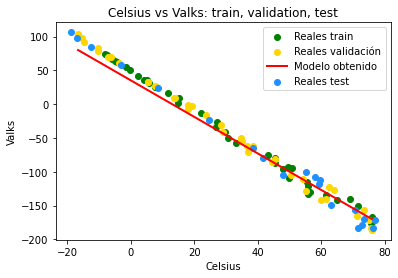

In [17]:
# Graficar en un gráfico de dispersión los datos reales del subset de entrenamiento (Celsius vs Valks)

plt.scatter(training_sorted["Celsius"], training_sorted["Valks"], color = "green", label = "Reales train")

# Graficar en el mismo gráfico la tendencia de las predicciones de entrenamiento con una recta que pase por ellas

#plt.plot(training_sorted["Celsius"], train_predictions, color = "red", linewidth = 2, label = "Modelo obtenido")

# Graficar en el mismo gráfico de dispersión los datos reales del subset de validación (Celsius vs Valks)

plt.scatter(validation_sorted["Celsius"], validation_sorted["Valks"], color = "gold", label = "Reales validación")

# Graficar en el mismo gráfico la tendencia de las predicciones de validación con una recta que pase por ellas

plt.plot(validation_sorted["Celsius"], validation_predictions, color = "red", linewidth = 2, 
         label = "Modelo obtenido")

# Graficar en el mismo gráfico de dispersión los datos reales del subset de prueba (Celsius vs Valks)

plt.scatter(test_sorted["Celsius"], test_sorted["Valks"], color = "dodgerblue", label = "Reales test")

# Graficar en el mismo gráfico la tendencia de las predicciones de prueba con una recta que pase por ellas

#plt.plot(test_sorted["Celsius"], test_predictions, color = "brown", linewidth = 2, label = "Predicciones test")

# Graficar grados celsius en el eje horizontal

plt.xlabel("Celsius") 

# Graficar grados Valks en el eje vertical

plt.ylabel("Valks") 

# Título del gráfico

plt.title("Celsius vs Valks: train, validation, test")

# Agregar leyenda al gráfico

plt.legend()

# Mostrar gráfico con los datos de los 3 subsets y sus modelos obtenidos

plt.show() 


## Creación de instancias para el análisis

In [31]:
# Crear una lista de 19 números enteros comprendidos entre 3 y 39, sin repetición

# Nota: la lista de enteros ya incluirá al 2

instancias_analisis = [2] + rnd.sample(range(3, 40), 19)

# Mostrar las instancias (enteros aleatorios del 2 al 39 sin reemplazo e incluyendo al 2) a usar para el análsis

instancias_analisis

[2, 7, 23, 30, 33, 16, 9, 11, 24, 37, 8, 38, 22, 31, 19, 17, 21, 29, 34, 10]

In [32]:
# Validar que cada entero de la lista anterior tenga una frecuencia absoluta igual a 1, es decir que 
# solamente aparezca una vez en la lista y que no haya ningún elemento repetido en ella

# Convertimos la lista en serie para poder aplicar el método value_counts() para contar la frecuencia de cada
# elemento dentro de la misma

pd.Series(instancias_analisis).value_counts()

2     1
7     1
34    1
29    1
21    1
17    1
19    1
31    1
22    1
38    1
8     1
37    1
24    1
11    1
9     1
16    1
33    1
30    1
23    1
10    1
dtype: int64

## 100 modelos entrenados por tamaño de muestra

In [20]:
# Crear una lista vacía que será la lista principal que contenga a los 20 grupos de 100 modelos cada uno

totalidad_modelos = []

# Ciclo for externo para iterar sobre cada tamaño de muestra y entrenar 100 modelos en base al mismo

for tamano_muestra in instancias_analisis:
    
    # Crear lista vacía para almacenar los 100 modelos entrenados con un cierto tamaño muestral
    
    grupo_modelos = []
    
    # ciclo for interno para crear y entrenar 100 modelos con un subconjunto aleatorio del
    # subset de entrenamiento de tamaño igual al valor de la variable del ciclo externo
    # tamano_muestra
    
    for i in range(100):
        
        # Extraer subconjunto aleatorio del subset de entrenamiento para entrenar cada modelo
        # el subconjunto será de tamaño igual a tamano_muestra
        
        # Aplicar método sample sobre el subset de entrenamiento para extraer la muestra aleatoria
        # del tamaño especificado y axis = 0 para indicar que se deben muestrear las filas
        # del subset de entrenamiento
        
        model_training = datos_train.sample(tamano_muestra, axis = 0)
        
        # Definir nuevo modelo de regresión con máximo de 500,000 iteraciones y una tasa de aprendizaje
        # inicial de 0.0001 
        
        new_model = SGDRegressor(max_iter = 500000, eta0 = 0.0001)
        
        # Entrenar el nuevo modelo generado con el subconjunto aleatorio definido previamente
        
        new_model.fit(model_training["Celsius"].to_numpy().reshape(-1, 1), model_training["Valks"])
        
        # Agregar el nuevo modelo entrenado a la lista de modelos definida como grupo_modelos
        
        grupo_modelos.append(new_model)
        
    # Agregar el grupo de 100 modelos entrenados grupo_modelos a la lista global de grupos de modelos, junto
    # con el tamaño de muestra con el que los modelos del grupo fueron entrenados
    
    totalidad_modelos.append([grupo_modelos])
 

## MSE por modelo en el subconjunto de entrenamiento y validación

In [21]:
"""Para llevar a cabo esta parte del análisis, se creará una estructura de datos principal de la forma:

   [[[MSE_train1, MSE_validation1], [MSE_train2, MSE_validation2], ...], [[[], [], ...], [[], [], ...], ...]
   
   En la estructura mencionada, la lista externa contendrá 20 listas principales correspondientes a un grupo de 100
   modelos entrenados cada una, por lo que cada una de las 20 listas principales contendrá 100 tuplas internas, mismas
   que contendrán a su vez 2 valores cada una: el MSE en el subconjunto de entrenamiento para un cierto modelo y 
   el MSE en el subconjunto de validación para dicho modelo """

# Crear una lista vacía para almacenar las 20 tuplas principales correspondientes a cada grupo de 100 modelos

lista_global_errores = []

# Ciclo for para iterar sobre cada uno de los 20 grupos de 100 modelos entrenados

for n_grupo in range(len(totalidad_modelos)):
    
    # Crear lista vacía para almacenar otras 100 tuplas que contendrán cada una el MSE 
    # de un modelo del grupo en el subconjunto de entrenamiento y en el de validación
    
    model_group = []
    
    # Ciclo for interno para iterar sobre cada uno de los 20 grupos de 100 modelos entrenados
    
    for grupo in totalidad_modelos[n_grupo]:
        
        # Segundo ciclo for interno para iterar sobre cada uno de los 100 modelos del grupo elegido
        # en el ciclo interno previo
        
        for n_model in range(len(grupo)):
            
            # Elegir un modelo del grupo de 100 modelos y predecir los datos en Valks a partir de él
            # utilizando los datos en celsius del subconjunto de entrenamiento
            
            # Convertir datos en celsius a un array de numpy y cambiar su forma para que sea una 
            # estructura de datos bidimensional (2D)
            
            # Calcular las predicciones en valks usando el modelo seleccionado del grupo a partir del
            # subconjunto de entrenamiento con un número cambiante de muestras
            
            pred_selected = grupo[n_model].predict(model_training["Celsius"].to_numpy().reshape(-1, 1))
            
            # Calcular las predicciones en valks usando el modelo seleccionado del grupo a partir del
            # subconjunto de validación
            
            pred_selected_val = grupo[n_model].predict(validation["Celsius"].to_numpy().reshape(-1, 1))
            
            # Calcular el valor del MSE para dicho modelo en el subconjunto de entrenamiento de
            # tamaño variable y en el conjunto de validación
            
            MSE_errors_model = [mean_squared_error(model_training["Valks"], pred_selected), #MSE en el subconjunto de train
                                mean_squared_error(validation["Valks"], pred_selected_val)] #MSE en el subconjunto de validación
            
            # Agregar la lista con los errores calculados a la lista model_group donde se almacenan
            # las tuplas con los errores calculados para cada uno de los 100 modelos del grupo
            
            model_group.append(MSE_errors_model)
        
        # Agregar el grupo de listas model_group a la lista principal par almancenar los grupos de tuplas
        # llamada lista_global_errores
        
        lista_global_errores.append(model_group)


## Promedio de las 100 repeticiones para cada modelo y sus errores

In [40]:
# Generar una lista vacía para almacenar los errores MSE en el subconjunto de entrenamiento de muestras
# cambiantes para cada uno de los 20 grupos de 100 modelos entrenados 

MSE_train_model_groups = [] 

# Generar una lista vacía para almacenar los errores MSE en el subconjunto de validación 
# para cada uno de los 20 grupos de 100 modelos entrenados 

MSE_val_model_groups = [] 

# Ciclo for para iterar sobre cada uno de los 20 grupos de 100 modelos (2000 modelos en total)

for group_index in range(len(totalidad_modelos)):
    
    # Definir los datos de los errores MSE para el grupo de modelos elegido
    
    data_group = pd.DataFrame(lista_global_errores[group_index], columns = ["MSE_train", "MSE_validation"])
    
    # Calcular el error MSE promedio del grupo de modelos en cuestión a partir del subconjunto de 
    # entrenamiento de muestras cambiantes
    
    AVG_MSE_train = data_group["MSE_train"].mean()
    
    # Calcular el error MSE promedio del grupo de modelos en cuestión a partir del subconjunto de 
    # vlidación
    
    AVG_MSE_validation = data_group["MSE_validation"].mean()
    
    # Agregar el MSE promedio del grupo de modelos a partir del subconjunto de entrenamiento de muestras
    # cambiantes a la lista para los errores MSE a partir del subconjunto de entrenamiento variable 
    # de los grupos de modelos (MSE_train_model_groups)
    
    MSE_train_model_groups.append(AVG_MSE_train)
    
    # Agregar el MSE promedio del grupo de modelos a partir del subconjunto de validación
    # a la lista para los errores MSE a partir del subconjunto de validación 
    # de los grupos de modelos (MSE_val_model_groups)
    
    MSE_val_model_groups.append(AVG_MSE_validation)
    
    # Eliminar la variable data_group para que en la próxima iteración, se asigne un nuevo conjunto de
    # datos (errores) que corresponderán al próximo grupo elegido de modelos
    
    del data_group
    
# Generar un dataframe para almacenar la información referente al error MSE promedio tanto en el 
# subconjunto de entrenamiento de muestras cambiantes como en el subconjunto de validación, para
# cada grupo de 100 modelos

df_MSE = pd.DataFrame({"AVG_MSE_train": MSE_train_model_groups, "AVG_MSE_validation": MSE_val_model_groups})

# Mostrar los primeros registros de los MSE promedio para los grupos de modelos

df_MSE


,AVG_MSE_train,AVG_MSE_validation
0,3145.682004,3628.905824
1,587.625601,669.210491
2,583.179779,666.054177
3,581.538855,660.064415
4,558.372947,639.794726
5,417.040708,482.800869
6,631.046779,716.991730
7,641.387201,725.624125
8,419.947151,483.109660
9,508.546535,578.105073


In [41]:
# Agregar a las listas previas, los errores de entrenamiento y validación de la línea base, es decir, 
# errores para entrenamiento y validación correspondientes al modelo base entrenado con 40 muestras

errores_base = pd.DataFrame(np.array([MSE_validation, MSE_train]).reshape(1, 2), 
                            columns = ["AVG_MSE_train", "AVG_MSE_validation"])

# Agregar la nueva fila definida como dataframe al dataframe con 20 registros previo

df_MSE = pd.concat([df_MSE, errores_base], axis = 0, ignore_index = True)

# Mostrar dataframe de errores MSE promedio con el nuevo registro (errores del modelo base)

df_MSE


,AVG_MSE_train,AVG_MSE_validation
0,3145.682004,3628.905824
1,587.625601,669.210491
2,583.179779,666.054177
3,581.538855,660.064415
4,558.372947,639.794726
5,417.040708,482.800869
6,631.046779,716.991730
7,641.387201,725.624125
8,419.947151,483.109660
9,508.546535,578.105073


**Nota:** el registro 20 del dataframe anterior representa los errores de entrenamiento y validación del modelo base entrenado inicialmente con 40 muestras.

## Gráfica de evolución del error promedio de entrenamiento y validación por tamaño de entrenamiento

In [42]:
# Agregar al dataframe de errores promedio, el tamaño de muestra con el que cada grupo de modelos fue entrenado
# Se agrega adicionalmente el tamaño de muestra 40 para la última fila de errores MSE promedio 
# (de los modelos entrenados con 40 muestras)

df_MSE["Tamaño_muestra"] = instancias_analisis + [40]

# Ordenar los datos de errores MSE promedio por tamaño de muestra de menor a mayor tamaño muestral

df_MSE.sort_values(by = "Tamaño_muestra", inplace = True)

# Mostrar dataframe de errores MSE promedio con la nueva columna de tamaño de muestra

df_MSE

,AVG_MSE_train,AVG_MSE_validation,Tamaño_muestra
0,3145.682004,3628.905824,2
1,587.625601,669.210491,7
10,226.884039,283.445496,8
6,631.046779,716.991730,9
19,412.582077,506.914277,10
7,641.387201,725.624125,11
5,417.040708,482.800869,16
15,398.367326,466.492048,17
14,479.150967,547.084876,19
16,644.908829,728.251640,21


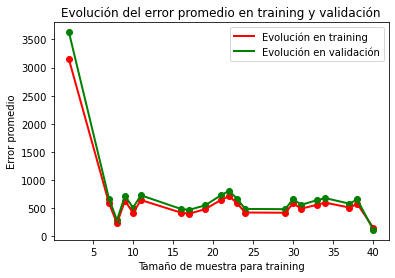

In [43]:
# Graficar los tamaños de muestra para entrenamiento contra los errores promedio derivados del subconjunto de entrenamiento

plt.scatter(df_MSE["Tamaño_muestra"], df_MSE["AVG_MSE_train"], color = "red")

plt.plot(df_MSE["Tamaño_muestra"], df_MSE["AVG_MSE_train"], color = "red", label = "Evolución en training", 
        linewidth = 2)

# Graficar los tamaños de muestra para entrenamiento contra los errores promedio derivados del subconjunto de validación

plt.scatter(df_MSE["Tamaño_muestra"], df_MSE["AVG_MSE_validation"], color = "green")

plt.plot(df_MSE["Tamaño_muestra"], df_MSE["AVG_MSE_validation"], color = "green", label = "Evolución en validación", 
        linewidth = 2)

# Nombre del eje horizontal (x)

plt.xlabel("Tamaño de muestra para training")

# Nombre del eje vertical (y)

plt.ylabel("Error promedio")

# Título del gráfico

plt.title("Evolución del error promedio en training y validación")

# Agregar una leyenda al gráfico

plt.legend()

# Mostrar el gráfico elaborado

plt.show()


## Interpretación del gráfico de tamaño muestral vs error promedio

En términos generales, en cuanto a la gráfica previa, es posible observar que para el modelo entrenado con el mínimo tamaño 
de muestra de entrenamiento posible (2 muestras), el gráfico muestra que para ese tamaño muestral, el grado de error promedio tanto del entrenamiento como de la validación del modelo es muy elevado, dado que en este caso particular, el error promedio para el entrenamiento fue ligeramente superior a 3000, mientras que de forma similar, el error promedio correspondiente a la validación fue ligeramente superior a 3500, motivo por el cual, al entrenar un modelo con solamente 2 muestras de datos, se tienen errores promedio muy altos, lo cual indica que el modelo en cuestión no se ajusta adecuadamente a los datos, lo cual se encuentra respaldado por el hecho de que los modelos entrenados con muestras de tamaño 2, presentaron un MSE promedio de 3145.68 en el conjunto de entrenamiento, además de un MSE promedio de 3628.90 en el conjunto de validación, lo cual pone de manifiesto que los modelos entrenados con una muestra de tamaño 2 presentan un tipo de ajuste denominado como subajuste (underfitting), esto principalmente debido a que al entrenar los modelos con una cantidad de muestras bastante reducida, dichos modelos no serán capaces de aprender correctamente los patrones detrás de dichos datos, ya que es necesaria una mayor cantidad de éstos para que pueda surgir algún patrón o tendencia claramente definido, además de lo anterior, también cabe mencionar que debido al hecho de que los modelos entrenados con muestras de tamaño 2 tienen valores de MSE muy elevados, se afirma que existe un grado de sesgo alto en dichos modelos, dado que las diferencias entre los valores reales que intentaron predecir y los que finalmente predijeron, son significativamente grandes, por lo que lo anterior referente a tener un sesgo alto señala que los modelos en cuestión no representan con suficiente precisión aquellos datos reales que se intentan predecir, por lo tanto, no son buenos ajustes para los datos reales que son el objetivo central de las predicciones (aproximar lo máximo posible las predicciones a los datos reales), sin embargo, otro criterio para determinar si los modelos constituyen un buen ajuste para los datos reales es por medio del análisis de la varianza de los mismos, por lo cual, en caso de que la varianza sea muy grande, significará que nuevamente las diferencias entre datos reales y predicciones serán muy altas y por tanto el modelo no será preciso y como consecuencia también sus predicciones no serán confiables, por lo que teniendo esto en cuenta, para el caso particular de los modelos entrenados con muestras de tamaño 2, en el gráfico previo se puede apreciar que para dichos modelos en específico, el MSE promedio en el subconjunto de entrenamiento fue ligeramente superior a 3000, mientras que su MSE promedio en el subconjunto de validación fue mayor a 3500, por lo cual se observa una diferencia mayormente significativa entre ambos errores promedio, lo cual indica a su vez que los modelos en cuestión (entrenados con muestras de tamaño 2), como ya se mencionó anteriormente, tienen un alto grado de sesgo, lo cual implica a su vez que los modelos en cuestión entrenados con muestras de tamaño 2, tienen un grado de varianza bajo, lo cual a su vez implica que en el modelo en cuestión, el valor de la variable de respuesta (grados en valks) tiene una baja sensibilidad a cambios en los datos de la variable predictora (grados en celsius), por lo tanto, eso significa que las predicciones del modelo tendrán valores mayormente cercanos entre sí, pero dichas predicciones no representarán de forma confiable los datos reales que se tratan de predecir, por lo cual, conisderando todo lo anterior, se afirma que en efecto, dichos modelos presentan subajuste (underfitting) como se mencionó previamente, provocando a su vez altos errores de predicción y una confiabilidad prácticamente nula de sus predicciones. 

Por otra parte, también es importante mencionar que respecto al modelo entrenado con 40 muestras, en la gráfica anterior se puede observar que cuando el tamaño de las muestras de entrenamiento es igual a 40, el error MSE promedio en el subconjunto de entrenamiento adopta un valor de 149.39, lo cual es significativamente menor que el MSE promedio para el entrenamiento del modelo entrenado con 2 muestras, mientras que por otro lado, el error MSE promedio en el subconjunto de validación para el modelo entrenado con 40 muestras tiene un valor de 110.05, lo cual resulta ser considerablemente menor que el MSE promedio en el subconjunto de validación para los modelos entrenados con 2 muestras (tamaño muestral mínimo posible para el análisis), por lo cual, en base a lo anteriormente mencionado, se puede afirmar que el sesgo del modelo entrenado con 40 muestras es significativamente menor al del modelo entrenado con solamente 2 muestras, motivo por el cual, eso significa que debido principalmente al hecho de que los MSE promedio tanto en el subconjunto de entrenamiento como de validación para el modelo entrenado con 40 muestras son significativamente menores a los de los modelos entrenados con 2 muestras, se puede afirmar que dado que el modelo entrenado con el mayor número de muestras (modelo base), posee errores MSE promedio significativamente menores, eso implica que el grado de sesgo del mismo es bajo, dado que las diferencias entre los datos reales y las predicciones derivadas de dicho modelo también serán mucho menores, por lo que las predicciones derivadas del modelo base estarán mucho más próximas a los datos reales que se desean predecir, sin embargo, por otro lado, en cuanto a la varianza del modelo entrenado con 40 muestras, es posible afirmar que dado el hecho de que el sesgo de dicho modelo es bajo, entonces ese mismo modelo posee un grado de varianza alto, lo cual implica que dentro del modelo en cuestión, la variable de respuesta (grados en valks) será altamente sensible en su mayoría a cambios o variaciones en los datos de la variable predictora (grados en celsius), lo cual no necesariamente implicará que las predicciones derivadas del modelo sean incorrectas, sino que significará que el modelo será capaz de realizar predicciones que se encuentren dentro de un espacio significativamente más grande de posibles valores que puedan tomar los datos predichos por el modelo, lo cual a su vez podrá aumentar o disminuir notoriamente el grado total de error que tengan las predicciones del modelo, por lo cual será importante calcular otras métricas de error para evaluar el rendimiento del modelo además del cálculo del MSE, como pueden ser el coeficiente de determinación $R^{2}$ para saber qué tanto porcentaje de la variabilidad total de los datos que se desean predecir es capaz de explicar el modelo en cuestión, por lo que en caso de que dicho coeficiente adopte un valor menor a 0.7, podrá considerarse que el modelo no consigue explicar suficiente proporción de variaiblidad de los datos originales, por lo las predicciones derivadas del mismo no serán confiables para tomarlas en cuenta en un proceso de toma de decisiones cuyas implicaciones puedan ser bastante desfavorables para quienes tomen las decisiones.

Adicionalmente, otro aspecto que es muy importante mencionar radica en que con base en el gráfico previo, se evidencia que existe una relación entre el cambio en el tipo de ajuste que experimentan los modelos conforme aumenta el tamaño de muestra con el que son entrenados, esto debido a que en el gráfico se consigue apreciar que cuando el tamaño de muestra para entrenamiento es mayormente pequeño, concretamente igual a 2, el nivel de error MSE promedio resulta ser mayormente alto, mientras que también se aprecia que conforme se incrementa gradualmente el tamaño muestral para entrenamiento, el nivel de los errores MSE promedio tiende a disminuir, esto indica principalmente que los modelos entrenados experimentan cambios en cuanto a su grado de varianza y de sesgo, esto principalmente en el sentido de que cuando el tamaño de las muestras de entrenamiento comienza a aumentar, el grado de sesgo de los modelos comienza al mismo tiempo a disminuir, dado que por ejemplo, cuando el tamaño de muestra para entrenamiento aumenta de 2 a 5, se aprecia que los errores MSE promedio disminuyen, por lo que el sesgo para los modelos entrenados con 5 muestras resulta tener situado entre 1000 y 1500, en comparación con el sesgo de los modelos entrenados con 2 muestras que era superior a 3000, además, el grado de varianza para los modelos entrenados con 5 muestras resulta ser mayor al de aquellos entrenados con solo 2 muestras lo que implica que los modelos entrenados con 5 muestras son más sensibles a cambios en los datos de entrada que se les proporcionen en comparación con los de 2 muestras, cuyo grado de sensibilidad a cambios en los datos de entrada es menor, además de que al volver a incrementar el tamaño de muestras de entrenamiento, esta vez a 10 muestras, se observa que en ese caso los errores MSE promedio son notablemente menores que para 5 muestras, por lo cual, el sesgo de los modelos entrenados con 10 muestras resulta ser mayormente próximo a 500, aunque también dicho valor de sesgo resulta ser considerablemente menor al sesgo de los modelos entrenados con 5 muestras, por lo que los modelos entrenados con 10 muestras ofrecen predicciones significativamente más precisas que los entrenados con 5 muestras, además la varianza de los modelos entrenados con 10 muestras resulta ser considerablemente mayor a la de los modelos que se entrenan con 5 muestras, provocando que los modelos entrenados con tamaño muestral de 10 sean significativamente más sensibles a cambios en los datos de entrada que los entrenados con 5 muestras, además por otro lado, al entrenar modelos con 15 muestras, se observa que los errores MSE promedio nuevamente experimentan una ligera disminución en comparación con el caso previo de 10 muestras, lo cual implica que el sesgo de los modelos entrenados con 15 muestras resulta ser inferior a 1000, aunque dicho sesgo a su vez también es aproximadamente igual al de los modelos entrenados con 10 muestras, lo cual implica que los modelos entrenados con 15 muestras arrojan predicciones aproximadamente con la misma cantidad de precisión (aproximadamente la misma lejanía respecto de los datos reales) que los modelos entrenados con 10 muestras, además la varianza de los modelos entrenados con 15 muestras resulta ser aproximadamente idéntica a la de los entrenados con 10 muestras, por lo que los modelos entrenados con 15 muestras tienen aproximadamente la misma cantidad de sensibilidad a cambios en los datos de entrada porporcionados que los modelos entrenados con 10 muestras, por lo que las predicciones de los mismos tienen un margen de variación aproximadamente idéntico que en el caso de 10 muestras, por otro lado, para los modelos entrenados con 20 muestras, dado que los errores MSE promedio vuelven a disminuir ligeramente, el sesgo para los modelos entrenados con 20 muestras resulta tener un valor entre 500 y 1000, mismo que también es ligeramente mayor al sesgo de los modelos entrenados con 15 muestras, por lo cual, los modelos entrenados con 20 muestras tienden a devolver predicciones ligeramente menos precisas que los modelos entrenados con 15 muestras, además de que también la varianza de los modelos entrenados con 20 muestras es ligeramente menor a la de los modelos entrenados con 15 muestras, lo cual conduce a que con 20 muestras de entrenamiento, las predicciones de los modelos poseen una sensbilidad ligeramente más baja a fluctuaciones en los datos de entrada, lo cual lleva a que sus predicciones puedan tener un margen de variación ligeramente menor a las de los modelos entrenados con 15 muestras, mientras que al mismo tiempo, para los modelos entrenados con 25 muestras, los errores MSE promedio nuevamente disminuyen en una ligera proporción que con 20 muestras, por lo que el sesgo de los modelos entrenados con 25 muestras resulta tener un valor considerablemente inferior a 1000, aunque dicho sesgo también es ligeramente inferior al sesgo de los modelos entrenados con 20 muestras, por lo cual, los modelos entrenados con 25 muestras ofrecen predicciones ligeramente más precisas que los entrenados con 20, mientras que del mismo modo, la varianza de los modelos entrenados con 25 muestras resulta ser ligeramente mayor a la de los entrenados con 20, indicando que al entrenar modelos con 25 muestras, las predicciones de dichos modelos podrán presentar una mayor variación que las de aquellos entrenados con 20 muestras, mientras que de forma similar, para modelos que se entrenen con 30 muestras, los MSE promedio nuevamente incrementan ligeramente, provocando que el sesgo para dichos modelos entrenados con 30 muestras tenga un valor nuevamente ubicado entre 500 y 1000 tal como en el caso previo de 20 muestras, provocando que las predicciones de los modelos entrenados con 30 muestras tengan aproximadamente la misma cantidad de precisión que las de aquellos modelos que se entrenan con 20 muestras, además de que la varianza para los modelos entrenados con 30 muestras resulta ser ligeramente menor a la de los modelos entrenados con 25 muestras, lo cual implica que las predicciones de los modelos entrenados con 30 muestras son menos sensibles a variaciones en los datos de entrada, permitiendo que las predicciones de éstos modelos tengan un menor margen de variación que las de los modelos entrenados con 25 muestras, lo que ocasiona que las predicciones de modelos entrenados con 30 muestras ya se vayan acercando de forma notoria a los datos reales, mientras que por otro lado, para los modelos entrenados con 35 muestras, el sesgo resulta tener un valor considerablemente más cercano a 500 que a 1000, lo cual implica que las predicciones de dichos modelos, resultan ser más próximas a los datos reales (más precisas) que aquellas provenientes de modelos entrenados con 30 muestras, incrementando por tanto la confiabilidad de las predicciones de modelos entrenados con 35 muestras, además, la varianza para modelos que se entrenen con 35 muestras resulta ser ligeramente mayor a la de los modelos entrenados con 30 muestras, lo cual significa que las predicciones de los modelos entrenados con 35 muestras tienen una sensibilidad ligeramente mayor a los cambios en los datos de entrada que las de los modelos entrenados con 30 muestras, lo cual implica que las predicciones derivadas de modelos entrenados con 35 muestras poseen un margen de variación aún mayor que las de los modelos entrenados con 30 muestras, por lo que las predicciones que se obtengan de modelos entrenados con 35 muestras tienen un margen de variación más amplio, lo cual propicia que aumente la probabilidad de encontrar valores que se ajusten de la mejor forma posible a los datos reales, dentro de ese espacio más amplio de posibles valores que puedan tomar las predicciones del modelo, por lo que en resumen, al aumentar el número de muestras de entrenamiento, tanto el sesgo como la varianza de las predicciones de los modelos entrenados tendrán una tendencia general a disminuir, conduciendo a obtener predicciones cada vez más cercanas a los datos reales. 

Por lo cual, considerando lo anterior, se puede afirmar que en un principio cuando el tamaño de muestra para entrenamiento es igual a 2 (tamaño de muestra mínimo posible), el tipo de ajuste que experimenta el modelo es underfitting (subajuste), dado que el modelo al ser entrenado con muy pocas muestras, no pueden aprender algún patrón, o tendencia en particular detrás de los datos, ya que la cantidad altamente reducida de datos para aprender o entrenar modelos propicia que aún no exista algún patrón o tendencia específica subyacente a dichos datos, lo cual entorpece el proceso de aprendizaje o entrenamiento del modelo en cuestión, ya que no logrará aprender patrones o tendencias ocultos en los datos en base a los que es entrenado, resultando de esa manera en un proceso de entrenamiento deficiente y como consecuencia también en un rendimiento igualmente deficiente al predecir la salida en valks para datos en celsius que el modelo aún no conozca, por lo que el modelo no será capaz de predecir más allá de los datos que ha aprendido de su entrenamiento, motivo por el cual, en pocas palabras, a medida que el tamaño de muestra para entrenar los modelos aumenta, el tipo de ajuste de dichos modelos cambia de tal manera que en un principio al tener tamaño de muestra pequeño para entrenar, los modelos tienen underfitt, mientras que posteriormente al ir aumentando de forma gradual el tamaño muestral para el entrenamiento, el underfitt pasa a ser un ajuste de tipo fitt, puesto que al aumentar el tamaño de muestra para entrenar, se va definiendo gradualmente algún patrón o tendencia subyacente a ellos que los modelos puedan aprender durante su etapa de entrenamiento, por lo que las predicciones derivadas de los mismos también experimentan una mejoría gradual, no obstante, es necesario asegurarse de no incrementar de forma excesiva la cantidad de muestras para entrenar el modelo, ya que esto puede ocasionar que el modelo resultante para representar los datos originales se pueda tornar demasiado complejo (por ejemplo tener que agregar una cantidad de variables predictoras mucho mayor al modelo inicial), lo cual puede conducir a tener un overfitt, dado que el modelo al ser altamente complejo, tenderá a "memorizar" la salida de los datos de entrenamiento que se le proporcionen, dando como resultado un rendimiento y precisión aparentemente muy favorables al predecir los datos de entrenamiento, pero cuando el modelo se encuentre con datos que no conozca en absoluto, la precisión de sus predicciones decaerá de forma muy significativa, por lo cual lo adecuado es mantener el tamaño de muestra para el entrenamiento en valores que no sean muy bajos pero tampoco muy altos. 

**Nota 1:** el MSE es la representación del grado de sesgo de los modelos en cuestión.

**Nota 2:** Dado que el sesgo y la varianza se contraponen entre sí, a mayor sesgo menor varianza y viceversa.

## Tamaño de muestra más adecuado para el entrenamiento

En términos generales, en base al gráfico previamente realizado y al análisis para los diferentes tamaños de muestra para entrenamiento de los modelos, se puede observar que en efecto, al aumentar el tamaño muestral para el proceso de entrenamiento de los modelos, éstos mismos se ajustan gradualmente mejor a los datos que intentan predecir, esto se debe principalmente al hecho de que conforme los datos para entrenar los modelos son mayores en cantidad, es posible definir de una mejor manera el patrón o tendencia particular que seguirán dichos datos, por lo cual, en el caso de tomar en cuenta los tamaños de muestra comprendidos entre 35 y 40 sin tomar en cuenta a éste último tamaño, es posible notar en el gráfico anterior que para dichos tamaños muestrales, el MSE promedio tanto en el conjunto de entrenamiento como en el de validación, resulta tener un valor mayormente reducido y próximo a 0, en comparación con el resto de los tamaños de muestra para entrenamiento graficados, lo cual indica que cuando el modelo se entrena con una cantidad de muestras entre 35 y 40, es decir con un tamaño muestral muy cercano a  la máxima cantidad posible de muestras, los errores promedio de las predicciones contra las observaciones reales que se intentan predecir, adoptan los mínimos valores posibles, motivo por el cual, al entrenar el modelo con un tamaño muestral comprendido entre 35 y 40 muestras, prácticamente se logra definir lo mejor posible un determinado patrón o tendencia detrás de los datos que se desean predecir, por lo cual, al usar este tamaño de muestra, también permitirá que los modelos entrenados en base al mismo, puedan aprender con un grado mayor de facilidad dicho patrón o tendencia que subyace a los datos analizados, lo cual conducirá a que como consecuencia de lo anterior, el modelo entrenado tenga una capacidad mayor o más amplia para a su vez generalizar dicho patrón o tendencia aprendido a nuevas instancias que aún no conozca, es decir, que al momento de emplear el patrón o tendencia que haya aprendido de los datos de entrenamiento para predecir el resultado de la variable de respuesta (grados en valks) a partir de los datos de la variable predictora (grados en celsius), sobre un conjunto de datos que el modelo todavía no conozca, las predicciones resultantes de dicho modelo sobre dichos datos desconocidos para el mismo, sean mayormente precisas, en el sentido de que las predicciones derivadas del modelo tengan el mayor acercamiento posible a los valores de los datos verdaderos, motivo por el cual, se puede concluir que el tamaño de muestra más adecuado para el entrenamiento del modelo predictivo es un tamaño muestral entre 35 y 40, por lo cual, se escogerá un valor medio en ese rango, en concreto 38 muestras, como una cantidad mayormente adecuada de muestras para el entrenamiento del modelo.

**Nota:** No se eligió la cantidad máxima posible de muestras de entrenamiento (40 muestras) como la más adecuada, puesto que ya existe un modelo base entrenado con dicha cantidad de muestras, por lo que en caso de considerar a 40 como la cantidad más adecuada de muestras para entrenamiento, se generaría otro modelo exactamente con el mismo comportamiento predictivo que el modelo base generado inicialmente, por lo cual, se optó por elegir una cantidad de muestras no igual a 40, pero sí bastante cercana a 40 como lo es 38 muestras, con la finalidad principal de evitar repetir el mismo modelo base creado en un inicio.

## Entrenamiento de nuevo modelo con la cantidad más adecuada de muestras

In [44]:
# A continuación se procederá a crear y configurar otro modelo pero esta vez dicho modelo se entrenará con la
# cantidad de muestras más adecuada determinada anteriormente (38 muestras)

# Para el nuevo modelo a entrenar con 38 muestras, se pasará como argumento de entrada que dicho modelo tenga
# una tasa de aprendizaje inicial (eta0) de 1e-04, además de un máximo de 750,000 iteraciones para su entrenamiento

regresion_38 = SGDRegressor(eta0 = 1e-04, max_iter = 750000)

In [45]:
# Crear subset de entrenamiento de 38 muestras a partir del subconjunto de entrenamiento original de 40 muestras, utilizando
# la función sample de los objetos de tipo dataframe para obtener una muestra aleatoria de 38 registros (filas) para el 
# entrenamiento del nuevo modelo

# El parámetro de entrada n = 38 indica a la función sample que se tomen aleatoriamente 
# 38 elementos del subconjunto de datos de entrenamiento original de 40 muestras, mientras 
# que el parámetro replace = False señala a la función sample() que el muestreo de elementos
# se realice sin reemplazo (sin elementos repetidos), mientras que el parámetro axis = 0 indica a
# la función sample() que realice un muestreo de los registros del dataframe de entrenamiento,
# por lo cual, el resultado será un dataframe de 38 registros aleatorios y no repetidos

model38_train = datos_train.sample(n = 38, replace = False, axis = 0)

# Verificar que ningún registro de la muestra de tamaño 38 esté repetido (la frecuencia absoluta de cada registro debe ser 1)

model38_train.value_counts()

Celsius    Valks    
-8.10020    74.2470     1
 55.72000  -121.0900    1
 33.08000  -56.9110     1
 43.23600  -75.8350     1
 45.51000  -87.1070     1
 49.48300  -92.4120     1
 49.90800  -108.5900    1
 50.93600  -94.7800     1
 55.46900  -115.0400    1
 55.77400  -133.3800    1
-7.30130    73.2690     1
 56.55200  -129.8700    1
 61.42800  -134.0700    1
 64.91300  -142.0200    1
 69.09000  -140.6400    1
 71.57400  -150.5800    1
 75.71700  -175.8300    1
 75.92900  -166.9400    1
 30.59600  -49.3740     1
 29.83600  -41.7300     1
 27.32900  -27.0320     1
 26.93900  -34.2550     1
-5.81140    66.3700     1
-5.07060    64.1060     1
-4.23870    61.9730     1
-1.31270    54.2760     1
-0.34047    51.1010     1
 2.38120    42.1590     1
 4.35250    36.2140     1
 5.10840    35.1830     1
 5.75080    31.9840     1
 7.60250    25.0800     1
 7.84980    24.6800     1
 11.71000   16.1430     1
 14.99800   1.3718      1
 15.16600   8.7740      1
 22.17600  -12.8820     1
 75.94900  -174.9

In [46]:
# Entrenar el modelo nuevo con la muestra aleatoria de 38 registros obtenida previamente

# Los datos en celsius del subconjunto de entrenamiento se convierten a un array de numpy y se
# redimensionan para que tengan 2 dimensiones en vez de 1 y así sean aceptados por el método
# fit()

regresion_38.fit(model38_train["Celsius"].to_numpy().reshape(-1, 1), model38_train["Valks"])

SGDRegressor(eta0=0.0001, max_iter=750000)

### MSE del nuevo modelo sobre el subconjunto de entrenamiento, validación y prueba

In [47]:
# Generar las predicciones de los valks del subconjunto de entrenamiento de 38 muestras utilzando el 
# nuevo modelo entrenado

# Nuevamente, los datos de la variable predictora en la columna Celsius se convierten a un arreglo de
# numpy y luego se reforma dicho arreglo para que sea de 2 dimensiones, lo cual es requerido por el 
# método predict()

predicted_model38_train = regresion_38.predict(model38_train["Celsius"].to_numpy().reshape(-1, 1))

# Calcular el error cuadrático medio MSE del modelo en el subconjunto de entrenamiento de 38 muestras

MSE_model38_train = mean_squared_error(model38_train["Valks"], predicted_model38_train)

# Calcular las predicciones para los Valks del subconjunto de validación con el modelo entrenado con 38 muestras

predicted_model38_validation = regresion_38.predict(validation["Celsius"].to_numpy().reshape(-1, 1))

# Calcular MSE del modelo en el subconjunto de validación 

MSE_model38_validation = mean_squared_error(validation["Valks"], predicted_model38_validation)

# Calcular predicciones para los valks del subconjunto de prueba (test) con el modelo entrenado con 38 muestras

predicted_model38_test = regresion_38.predict(test_definitivo["Celsius"].to_numpy().reshape(-1, 1))

# Calcular MSE del modelo en el subconjunto de prueba o test, entrenado con 38 muestras

MSE_model38_test = mean_squared_error(test_definitivo["Valks"], predicted_model38_test)


In [48]:
# Desplegar en pantalla el valor del MSE en el subconjunto de entrenamiento del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de entrenamiento: {MSE_model38_train}')

MSE en el subconjunto de entrenamiento: 85.48710075245062


In [49]:
# Desplegar en pantalla el valor del MSE en el subconjunto de validación del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de validación: {MSE_model38_validation}')

MSE en el subconjunto de validación: 111.815553626574


In [50]:
# Desplegar en pantalla el valor del MSE en el subconjunto de testing o prueba del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de prueba/testing: {MSE_model38_test}')

MSE en el subconjunto de prueba/testing: 137.74389759394168


## Comparación de errores del modelo entrenado con 38 muestras y de los errores para la línea base

### Errores para la línea de base

In [51]:
# Mostrar el valor del MSE para el subset de datos de entrenamiento

print(f'MSE para subconjunto de entrenamiento: {MSE_train}')

# Mostrar el valor del MSE para el subset de datos de validación

print(f'MSE para subconjunto de validación: {MSE_validation}')

# Mostrar el valor del MSE para el subset de datos de prueba

print(f'MSE para subconjunto de prueba: {MSE_test}')

MSE para subconjunto de entrenamiento: 110.05915032672912
MSE para subconjunto de validación: 149.39443502824105
MSE para subconjunto de prueba: 167.74772561834524


### Errores del modelo entrenado con 38 muestras

In [52]:
# Desplegar en pantalla el valor del MSE en el subconjunto de entrenamiento del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de entrenamiento: {MSE_model38_train}')

# Desplegar en pantalla el valor del MSE en el subconjunto de validación del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de validación: {MSE_model38_validation}')

# Desplegar en pantalla el valor del MSE en el subconjunto de testing o prueba del modelo entrenado con 38 muestras

print(f'MSE en el subconjunto de prueba/testing: {MSE_model38_test}')

MSE en el subconjunto de entrenamiento: 85.48710075245062
MSE en el subconjunto de validación: 111.815553626574
MSE en el subconjunto de prueba/testing: 137.74389759394168


En base a los errores tanto del modelo base o línea de base y los errores del modelo entrenado con un total de 38 muestras, es posible observar que en relación a los errores en el subconjunto de entrenamiento, el error en el subconjunto de entrenamiento del modelo entrenado con 38 muestras resulta ser medianamente menor que el error en el subconjunto de entrenamiento de la línea base (modelo base), lo cual señala que el modelo entrenado con 38 muestras, posee un grado de sesgo medianamente más bajo que el modelo de la línea base, lo cual indica que las predicciones derivadas del modelo entrenado con 38 muestras, tienden a desviarse o alejarse en una proporción medianamente menor de los datos de entrenamiento reales de dicho modelo, por otro lado, el modelo de la línea base entrenado con las 40 muestras, posee el MSE más alto en su respectivo subconjunto de entrenamiento, por lo cual, éste modelo tiene el menor grado de precisión entre ambos modelos mencionados, junto con el mayor sesgo entre ambos modelos, por lo que las predicciones del modelo de la línea base estarán menos próximas a los datos reales de su subconjunto de entrenamiento correspondiente.

Por otra parte, en cuanto al error MSE en el subconjunto de validación general creado inicialmente, el modelo de la línea base posee un MSE de 149.39, mientras que para el modelo entrenado con 38 muestras, dicho MSE de validación es igual a 111.81, por lo cual, en este caso, el modelo entrenado con 38 muestras tiene el MSE menor de ambos en el conjunto de validación general, lo cual significa que dicho modelo consiguió ajustar de la mejor manera sus hiperparámetros hasta el punto en el que tuvieran todos el mejor valor posible, lo cual se refleja en el hecho de que dicho modelo tenga el menor valor de MSE en el subconjunto general para la validación de los modelos, no obstante, por otro lado, aquel modelo que tiene el MSE mayor en el subconjunto de validación es el modelo de la línea base, lo cual indica que dicho modelo, no consiguió ajustar de la mejor manera, los valores de sus hiperparámetros con tal de ajustarse lo mejor posible a los datos reales, por lo cual, las predicciones derivadas del modelo de la línea base no tendrán el mayor grado de precisión posible entre ambos modelos mencionados, ya que el modelo base no tiene coeficientes que representan de la mejor forma posible la variabilidad de los datos originales, mientras que por el contrario, el modelo entrenado con 38 muestras, posee el ajuste más adecuado de sus hiperparámetros, lo cual conduce a que dicho modelo al momento de calcular las predicciones de los datos originales de entrada en grados celsius, los datos de salida en grados valks tengan un grado de precisión mucho mayor que los datos de salida en Valks predichos por el modelo de la línea base, por lo que nuevamente, el modelo de la línea base resulta arrojar predicciones de una menor calidad en cuanto a precisión y nivel de sesgo reducido en comparación con el modelo entrenado con 38 muestras. 

Por último, respecto a los errores MSE en el subconjunto de prueba general, se logra apreciar que el error MSE para el modelo de la línea base es igual a 167.74, mientras que al mismo tiempo, el error MSE en el subconjunto de prueba para el modelo entrenado con 38 muestras resulta ser igual a 137.74, por lo cual se evidencia que el modelo entrenado con 38 muestras nuevamente es el que tiene el menor error MSE, lo cual, en este contexto en particular, significa que dicho modelo presenta el nivel de rendimiento más alto de los dos modelos mencionados al momento de ponerlo a prueba para predecir los grados en valks a partir de los grados celsius, lo cual implica que ese mismo modelo, nuevamente posee el mayor grado de precisión en cuanto a las predicciones que calcula, por lo cual, las predicciones derivadas del mismo representan de la mejor forma posible a los datos reales en cuestión, lo cual indica que el modelo entrenado con 38 muestras es de una calidad medianamente mayor en cuanto a las predicciones que calcula, mientras que por el contrario, en el caso del modelo de la línea base, éste mismo es el modelo que a su vez posee el mayor MSE en el subconjunto de datos de prueba, lo cual indica que dicho modelo es el que aporta predicciones menos precisas entre ambos modelos descritos, por lo cual, el modelo de la línea base es de una calidad más baja que el modelo entrenado con 38 muestras, dado que el primero (modelo de la línea base) logra calcular predicciones que se aproximan en menor medida a los datos reales que se desean predecir, mientras que el modelo entrenado con 38 muestras aporta predicciones que al contrario, se acercan en su mayoría a los datos verdaderos a predecir, motivo por el cual, bajo este criterio, es mejor el modelo entrenado con 38 muestras para predecir las equivalencias en Valks de los datos en grados celsius reales de los cuales se desea saber los valores de sus equivalencias en valks de una forma altamente precisa y a la vez también altamente confiable. 

## Configuración que funcionó mejor y por qué

Finalmente, a manera de conclusión final de todo el análisis realizado con anterioridad, es posible concluir que de los 2 mejores modelos, mismos que fueron tanto el modelo de la línea base entrenado inicialmente junto con el modelo entrenado con 38 muestras, el modelo entrenado con 38 muestras resultó ser el aquel que tuvo la mejor configuración de los 2, la cual consistió en que se entrenara al modelo de regresión lineal con gradiente descendente estocástico con un parámetro eta0 (tasa de aprendizaje inicial del modelo) igual a 1e-04 (1 diezmilésima), además de una cantidad máxima de iteraciones igual a 750 mil, por lo cual, al momento de aplicar ésta configuración durante el entrenamiento del modelo entrenado con 38 muestras, se obtuvo un modelo con un mejor grado de rendimiento que el modelo de la línea base, además de que éste último modelo tiene una configuración con parámetros de eta0 = 1e-04 y número máximo de iteraciones igual a 1 millón, por lo cual, la primera configuración mencionada que corresponde al modelo entrenado con 38 muestras, fue aquella que funcionó mejor, principalmente debido a que a pesar de que ambos modelos tengan el mismo valor de la tasa de aprendizaje inicial (1e-04), su configuración difiere de forma mayormente significativa en cuanto al valor del parámetro max_iter (máximo número de iteraciones para entrenar el modelo) que tiene cada uno de los 2 modelos mencionados, ya que el modelo de la línea base tiene un máximo de iteraciones de 1 millón, mientras que el modelo entrenado con 38 muestras tiene un máximo de iteraciones igual a 750 mil, por lo cual se evidencia que de 1 modelo al otro, existe una diferencia altamente significativa en cuanto al máximo de iteraciones con el que fue entrenado dicho modelo, por lo cual, a pesar de que el modelo entrenado con 38 muestras tiene el menor número máximo de iteraciones, éste mismo fue capaz de recibir un mejor entrenamiento y como consecuencia, eso resultó en predicciones más precisas, sin embargo, el segundo modelo referente al de la línea base y con un máximo de 1 millón iteraciones, no logró arrojar predicciones con el mismo grado de precisión que el modelo entrenado con 38 muestras, motivo por el cual, eso es un indicativo de que no necesariamente a mayor número máximo de iteraciones, aumenta la probabilidad de que el modelo entrenado lleve a cabo un mejor proceso de entrenamiento y en consecuncia sus predicciones sean más precisas y se acerquen más a los datos reales, sino que más allá del número máximo de iteraciones para el entrenamiento de los modelos, la calidad de los datos de entrenamiento en base a los cuales se creen los modelos tiene más impacto en la calidad predictiva de los mismos, lo cual tiene sentido, ya que al configurar y entrenar un modelo con datos de entrenamiento de una mejor calidad, dicho modelo puede aprender de mejor manera los patrones o tendencias subyacentes a los datos que se desean predecir (datos reales), lo cual aunado al hecho de que dicho modelo tiene una tasa de aprendizaje bastante pequeña (aprende a un ritmo mayormente lento), además de un máximo grande de iteraciones, la combinación de esos 3 factores (máximo grande de iteraciones, tasa de aprendizaje muy pequeña y datos de entrenamiento de alta calidad) ocasiona que el modelo en cuestión, durante su proceso de entrenamiento que también tendrá una duración mayormente considerable, adquiera una mayor capacidad de aprender en primera instancia el patrón o tendencia que siguen los datos y posteriormente sea capaz de aplicar dicho aprendizaje para predecir el valor de nuevas instancias o datos que aún no conozca, lo cual es el objetivo ideal de un modelo predictivo, es decir, el ser capaz de generalizar su aprendizaje para predecir de manera acertada datos que nunca antes haya visto, por lo cual, en resumen, la configuración que tuvo el mejor funcionamiento fue aquella cuyo parámetro eta0 es igual a 1e-04 y a su vez, su máxima cantidad de iteraciones es igual a 750 mil porque de esa manera, el modelo tuvo mejores datos en cuanto a su calidad para aprender cómo es la naturaleza subyacente de los datos que se desean predecir, durante su etapa de entrenamiento, por lo que como resultado, el modelo entrenado con 38 muestras termina adquiriendo "conocimientos" adicionales sobre el patrón de los datos reales, que el segundo modelo referente al de la línea base entrenado con 40 muestras y 1 millón de iteraciones, no pudo adquirir debido a la calidad menor de los datos de entrenamiento que dicho modelo tuvo para aprender el patrón o tendencia que siguen los datos reales, lo cual explica la diferencia en la calidad de la capacidad predictiva de ambos modelos en el sentido de qué tanta precisión tienen sus predicciones y de su capacidad de generalizar el aprendizaje que adquirieron durante su entrenamiento para predecir la equivalencia en valks para datos en celsius que sean desconocidos para ambos modelos. 